In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
#reading a .data file.
dataset =  pd.read_csv('iris.data', sep=",",names =['sepal-length(cm)', 'sepal-width(cm)','petal-length(cm)', 'petal-width(cm)', 'target'])
dataset

,sepal-length(cm),sepal-width(cm),petal-length(cm),petal-width(cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
dataset.shape

(150, 5)

In [9]:
#therefore our target variable is categorical variable with 3 different classes.
y_counts=dataset["target"].value_counts()
print(y_counts)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64


In [10]:
dataset.isnull().sum()

sepal-length(cm)    0
sepal-width(cm)     0
petal-length(cm)    0
petal-width(cm)     0
target              0
dtype: int64

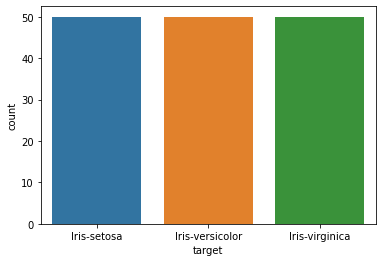

In [11]:
sns.countplot(dataset['target'])
plt.show()

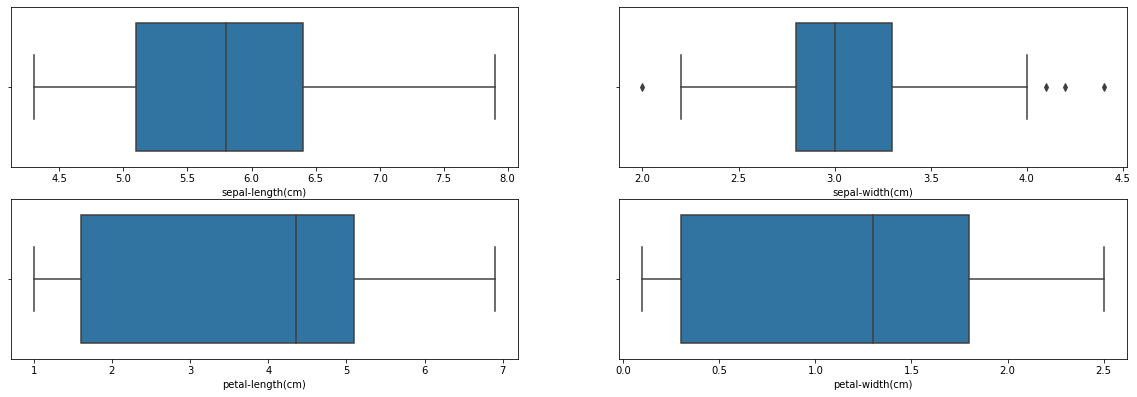

In [12]:
#only sepal-width has outliers.
#but it is not going to affect our accuracy

plt.figure(figsize=(20, 10))
columns = list(dataset.columns)
for i in range(4):
  plt.subplot(3, 2, i+1)
  sns.boxplot(dataset[columns[i]])
plt.show()

In [ ]:
#to remove outliers but it dosent affect our overall accuracy.

# IQR
# Q1 = np.percentile(dataset['sepal-width(cm)'], 25, interpolation = 'midpoint')
# Q3 = np.percentile(dataset['sepal-width(cm)'], 75, interpolation = 'midpoint')
# IQR = Q3 - Q1
# print("Old Shape: ", dataset.shape)
  
# upper = np.where(dataset['sepal-width(cm)'] >= (Q3+1.5*IQR))        # Upper bound
# lower = np.where(dataset['sepal-width(cm)'] <= (Q1-1.5*IQR))        # Lower bound
  
# # Removing the Outliers
# dataset.drop(upper[0], inplace = True)
# dataset.drop(lower[0], inplace = True)
  
# print("New Shape: ", dataset.shape)
# sns.boxplot(x='sepal-width(cm)', data=dataset)

In [13]:
#seperating dependent and independent variable and making X dataframe having all independent variables and Y dataframe having all dependent variables.
X=dataset.drop(['target'], axis=1)
Y=dataset['target']
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [14]:
from sklearn import preprocessing
normalized = preprocessing.normalize(X)

In [15]:
#splitting the dataset training dataset and test dataset
#80% training data and 20% test data.

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size =0.2, random_state = 0)

In [16]:
#printing the size of train and test dataset.
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(30, 4)
(30,)
(120, 4)
(120,)


In [17]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(x_train, y_train)

GaussianNB()

In [18]:
#finding accuracy of model.
accuracy = naive_bayes_model.score(x_test, y_test)
accuracy_train = naive_bayes_model.score(x_train, y_train)
print("Naive Bayes Model accuracy score of training dataset: {}".format(accuracy_train*100))
print("Naive Bayes Model accuracy score of test dataset: {}".format(accuracy*100))

Naive Bayes Model accuracy score of training dataset: 95.0
Naive Bayes Model accuracy score of test dataset: 96.66666666666667
